In [6]:
%matplotlib widget
# Add the directory containing the package to sys.path
import sys, os
package_dir = os.path.abspath("C:/Users/froll/Documents/Labo/Projets/Violon/ManipViolon_Anech_08062023")
if package_dir not in sys.path:
    sys.path.insert(0, package_dir)
import Tools3D as tools3d
package_dir = os.path.abspath("C:/Users/froll/Documents/Labo/Projets/Violon/ManipViolon_Anech_08062023/array-processing/toolboxes")
if package_dir not in sys.path:
    sys.path.insert(0, package_dir)
import array_processing as ap
package_dir = os.path.abspath("C:/Users/froll/Documents/Labo/Projets/Outils/swd")
if package_dir not in sys.path:
    sys.path.insert(0, package_dir)
from swd import spherical_processing as sp
from swd import geotools as geo
from swd import plots as splots
import swd as swd
import importlib

importlib.reload(swd.plots)
import numpy as np
from numpy import pi, cos, sin
import matplotlib.pyplot as plt
import utils_SHanalysis as SHutils
import GeoCalibUtils as gcu

import warnings
from utils_DirViolins import *
warnings.filterwarnings("ignore")
from tqdm import tqdm
np.set_printoptions(precision=2, suppress=True)
# Enable LaTeX rendering
plt.rc('text', usetex=True)

In [7]:
#Vitesse du son au moment de la mesure, dependant de la temperature:
Tc = 21.5 
C = np.sqrt( 1.4 * 287 *(Tc + 273) )
Path = './'
NbMems = 256
NbViolTot = 6
NbViol = 6
OSH = 7

NbSH = (OSH+1)**2
NumViolon = np.load('NumViolon.npz')['NumViolon']
XYZhBF = np.load('XYZh_BF.npz')['PosPtSrc']

XYZm4 = np.load("C:/Users/froll/Documents/Labo/Projets/Violon/ManipViolon_Anech_08062023/CalibGeo/XYZ_mics_ViolonUp.npy")
XYZm3a = np.load('XYZm_Calib3_aligne.npz')['XYZm'][:-2,:]
XYZref = np.load('XYZm_Calib3_aligne.npz')['XYZm'][-2:,:]

R, XYZm4a = gcu.procrustes(XYZm3a, XYZm4[:-1,:])
XYZm4aa = np.zeros_like(XYZm4a)
for ii in range(32):    
    XYZm4aa[ii*8:ii*8+8,:] = gcu.fit_line_8(XYZm4a[ii*8:ii*8+8,:])

XYZhetm_RMDU = np.load("C:/Users/froll/Documents/Labo/Projets/Violon/ManipViolon_Anech_08062023/CalibGeo/XYZhetm_RMDU.npy")
XYZm_RMDU = XYZhetm_RMDU[-256:,:]
R, XYZm_RMDUa = gcu.procrustes(XYZm4aa, XYZm_RMDU)
XYZhetm_RMDUc = XYZhetm_RMDU - XYZhetm_RMDU.mean(axis=0)
XYZhetm_RMDUa = np.dot(XYZhetm_RMDUc, R)- XYZm4aa.mean(axis=0)
XYZh_RMDU = XYZhetm_RMDUa[:30,:].reshape(NbViolTot,5,3)
XYZh_RMDU = XYZh_RMDU.mean(axis=1)

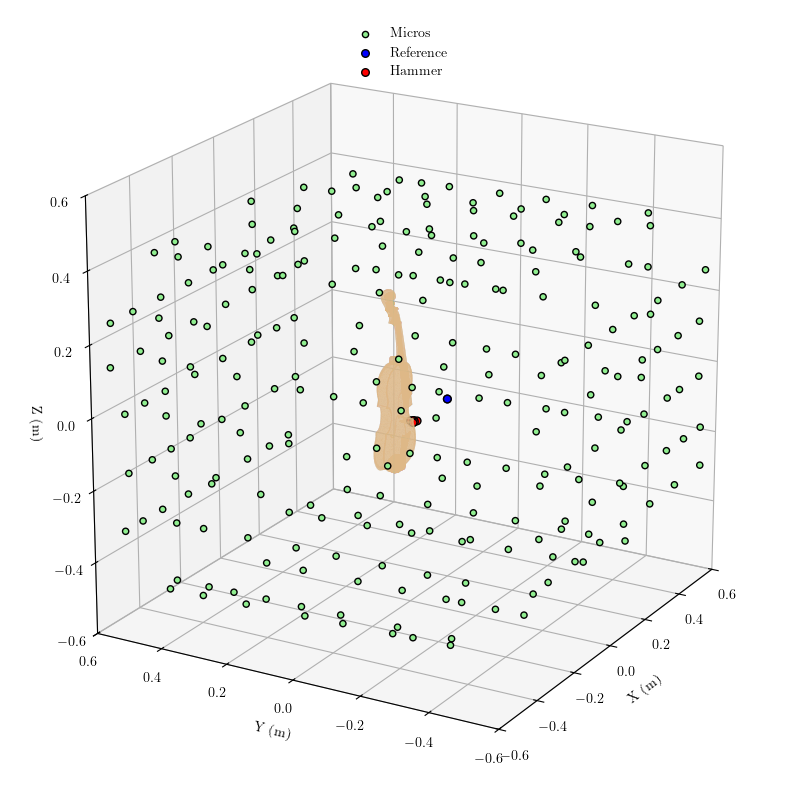

In [8]:

fig = plt.figure(1, figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')
#ax2.scatter(*XYZhBF.T, c ='b', marker='o',edgecolor='k', s=10, cmap='jet',alpha = 0.5, label = 'HammerBF')
ax2.scatter(*XYZm4aa.T, marker='o',facecolor ='lightgreen',edgecolor='k', s=20, alpha=1, label = 'Micros')
ax2.scatter(*XYZref.T, marker = 'o', facecolor ='blue', edgecolor='k', s=30 ,label='Reference')
ax2.scatter(*XYZh_RMDU.T, marker='o',facecolor ='red',edgecolor='k', s=30, alpha=1, label='Hammer')
#ax2.set_label([str(i) for i in NumF])
ax2.legend()  
L = 0.6
ax2.set_xlim([-L,L])
ax2.set_ylim([-L,L])
ax2.set_zlim([-L,L])
ax2.set_aspect('equal')

import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

mesh = trimesh.load('../violin.ply')  # Can also load .obj or .mtl files
# Extract vertices and faces
vertices = mesh.vertices
vertices-= vertices.mean(axis=0)
vertices *= 0.075


rx = 90 * pi/180 
ry = 0 * pi/180 
rz = 0 * pi/180
vertices = x_rotate_coordinates(vertices.T,    rx).T
# vertices = y_rotate_coordinates(vertices.T,    ry).T
vertices = z_rotate_coordinates(vertices.T,    rz).T
vertices += np.array([0.01,0.05,0.05])
faces = mesh.faces

light_brown = (0.87, 0.72, 0.53)  # RGB values for light brown
mesh_collection = Poly3DCollection(vertices[faces], alpha=0.75, edgecolor='none', facecolor=light_brown)
ax2.add_collection3d(mesh_collection)

# Set labels
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Z (m)')

ax2.view_init(elev=20, azim=210, roll=0) 
ax2.dist = 0.5  
ax2.legend(loc='upper center', fontsize=10, frameon=False)
plt.tight_layout()
# Show the plot
plt.show()

In [9]:
Pm = np.load('ViolinsPm.npz')['Pm']
frq = np.load('ViolinsPm.npz')['frq']

NbTh = 52   #Nombre de theta                                    
NbPh = 52   #Nombre de phi
frqMax = 10000
CyclicScale = 'icefire' #edge, icefire, phase, hsv
RealScale = 'seismic'
Magnitudescale = 'inferno'

## Process the Spherical Harmonics Spectra for each Violin

$$C_{mn}(f) = $$

In [10]:
XYZm=XYZm4aa
Centers = XYZh_RMDU

#Centrage du repère sur la position du marteau
XYZm -= np.mean(Centers,0)

Rm = np.linalg.norm(XYZm,axis=1)

Rmin = np.min(Rm)



In [11]:

Band = (frq>0) & (frq<frqMax)
f = frq[Band]
Nbf = len(f)
kvect= 2*pi*f.T/C
Nang = 50
NbTh, NbPh = 2*Nang+2, 2*Nang+2
angles_look, weights = swd.geotools.create_equal_angle_grid(Nang)

In [ ]:
ProcessCmn = True
O_SH_vect = sp.compute_N_SH_vect(f,N_SH_max = OSH,rmin = Rmin)
Ho2f = sp.compute_SphericalWavesbasis_origin_to_field(XYZm, kvect, OSH, SH_center = np.array([0,0,0], dtype = float))
NbDirs = angles_look.shape[0]

if ProcessCmn:
    Cmn = np.zeros((NbViol, NbSH, Nbf), dtype = np.complex128)    
    Diag = np.zeros((NbViol, NbDirs, Nbf), dtype = np.complex128)
    for v in tqdm(range(NbViol)):
        P  = Pm[v,Band,:].T
        Cmn[v,:,:] = sp.compute_SHcoefs(P,Ho2f,O_SH_vect, lambda_reg=1e-4)
        Diag[v,:,:] = sp.compute_Dinf_from_SH_coefs_at_origin(Cmn[v,:,:], angles_look, kvect)

    np.savez(f'Cmn.npz', Cmn = Cmn)
    np.savez(f'Diag.npz', Diag = Diag, angles_look = angles_look)
else:
    Cmn = np.load(f'Cmn.npz')['Cmn']
    Diag = np.load(f'Diag.npz')['Diag']

100%|██████████| 6/6 [03:45<00:00, 37.66s/it]


In [19]:
OSHSpec = []
no = 0
for o in range(OSH+1):
    sho = np.arange(2*o+1) + no
    no = sho[-1]+1
    OSHSpec.append(np.abs(np.sum(Cmn[:,sho,:], axis = 1))**2)
OSHSpec = np.rollaxis(np.array(OSHSpec),1,0)
OSHSpecN = OSHSpec/np.max(OSHSpec, axis = (1,2))[:,None,None]
OSHSpecdB = 10*np.log10(OSHSpec/np.max(OSHSpec))
OSHSpecdBmax = np.max(OSHSpecdB)

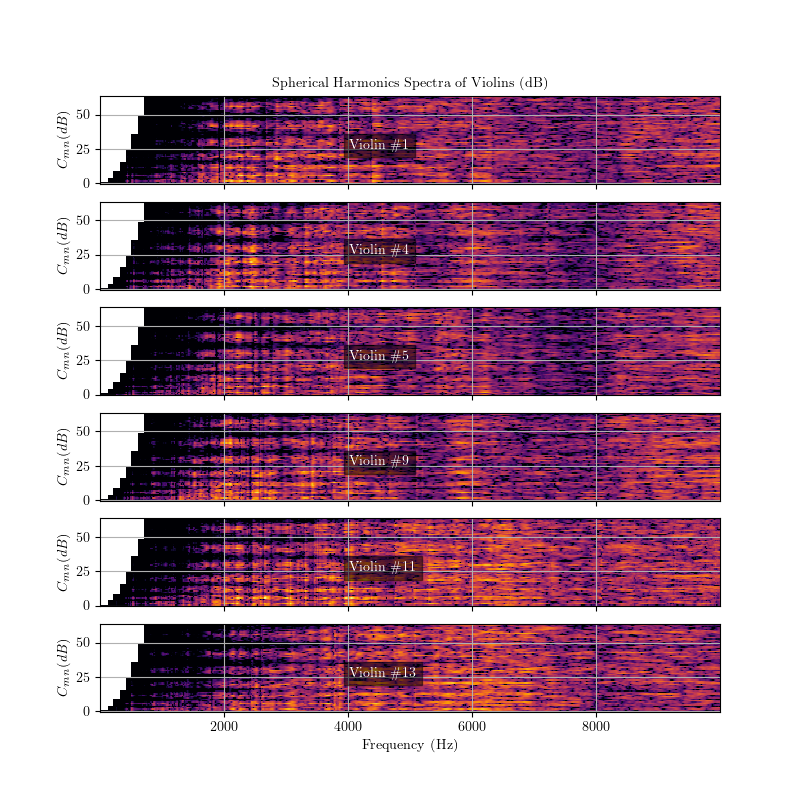

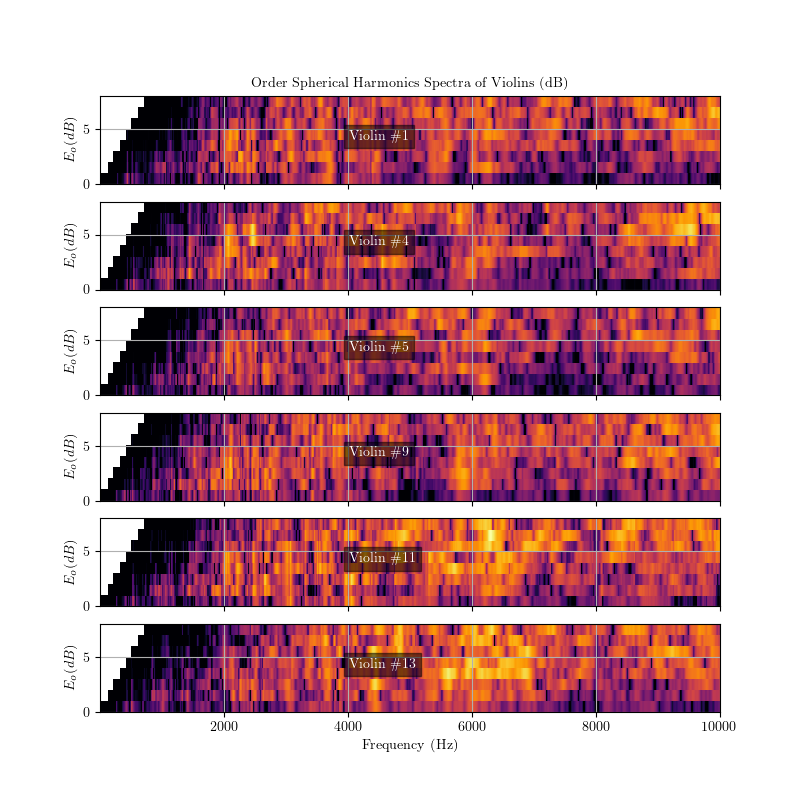

In [27]:
CmndB = 20*np.log10(np.abs(Cmn)/np.max(np.abs(Cmn)))
CmndBmax = np.max(CmndB)
Dyn = 36

NumViolon = [1, 4, 5, 9, 11, 13]  # Violons a analyser

figH,axH = plt.subplots(NbViol,1,figsize=(8,8))
figO,axO = plt.subplots(NbViol,1,figsize=(8,8))
for v in range(NbViol):
    c = axH[v].pcolor(f, np.arange(NbSH), CmndB[v,:,:], cmap=Magnitudescale, shading='nearest', vmin=CmndBmax-Dyn, vmax=CmndBmax)    
    axH[v].set_ylabel('$C_{mn} (dB)$')
    axH[v].grid()    
    axH[v].annotate(f"Violin \#{NumViolon[v]:d}", xy=(3800, 25), xytext=(10, 0), textcoords='offset points', color='white',
            bbox=dict(facecolor='black', alpha=0.5))
    if v < NbViol-1:
        axH[v].set_xticklabels([])
    else:    
        axH[v].set_xlabel('Frequency (Hz)')     
    if not v : 
        axH[v].set_title('Spherical Harmonics Spectra of Violins (dB)')   
        #fig.colorbar(c, ax[v]) 
    X = np.arange(f[0],f[-1]+2*(f[1]-f[0]),f[1]-f[0])
    c = axO[v].pcolor(X, np.arange(OSH+2), OSHSpecdB[v,:,:], cmap=Magnitudescale, shading='flat', vmin=OSHSpecdBmax-Dyn, vmax=OSHSpecdBmax)    
    axO[v].set_ylabel('$E_o (dB)$')
    axO[v].grid()    
    axO[v].annotate(f"Violin \#{NumViolon[v]:d}", xy=(3800, 4), xytext=(10, 0), textcoords='offset points', color='white',
            bbox=dict(facecolor='black', alpha=0.5))
    if v < NbViol-1:
        axO[v].set_xticklabels([])
    else:    
        axO[v].set_xlabel('Frequency (Hz)')     
    if not v : 
        axO[v].set_title('Order Spherical Harmonics Spectra of Violins (dB)')   
        #fig.colorbar(c, ax[v]) 
#fig.tight_layout()

## Wide Band Complex FarField Directivity
Summing the complex directivities at each frequency

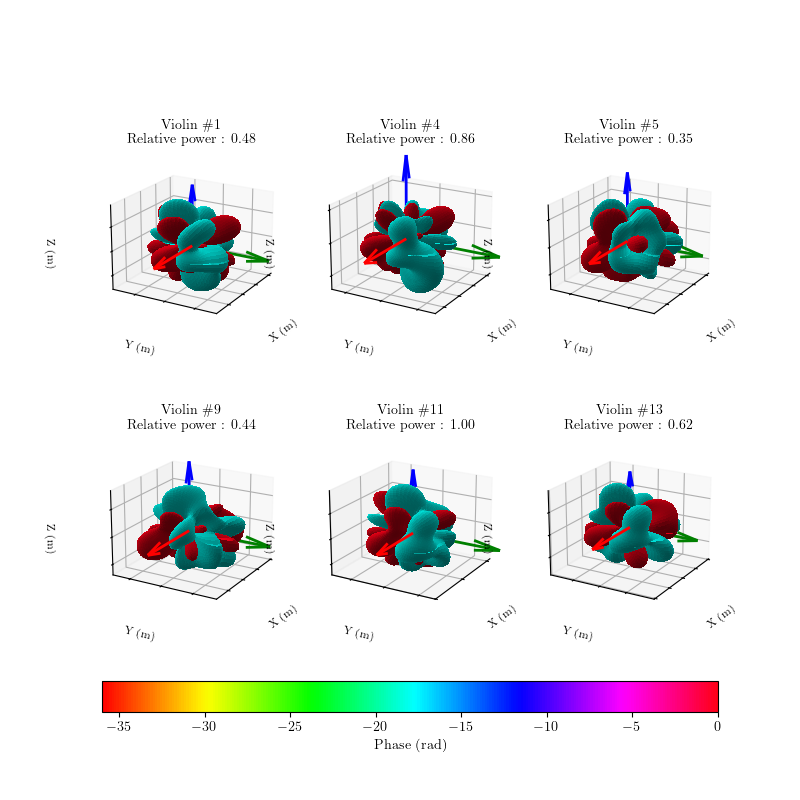

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from matplotlib import cm
importlib.reload(swd.plots)

Ro = 1
clim =0.25
NbViol = 6
WBDg = np.sum(Diag, axis=-1)
MaxWBDg = np.max(np.abs(np.real(WBDg)))
WBDg = np.real(WBDg)
WBDgN = WBDg/MaxWBDg               
WBPow = np.sum(WBDgN**2*weights.T, axis = 1)
WBPow /= np.max(WBPow)
Dyn = 36
# Create subplots with 3D scenes
figDg, ax = plt.subplots(2,3, figsize=(8, 8), subplot_kw={'projection': '3d'})
for v in range(NbViol):
    surf = splots.draw_directivity_balloon(dir_func = WBDgN[v,:], angular_grid = angles_look, 
                             nbtheta = 2*Nang+2, nbphi = 2*Nang+2, 
                             fig = figDg, ax = ax.flat[v], 
                             scale = 'dB', dynamic_range = Dyn,
                             ref_sphere  = False, phase =True, 
                             colorbar = False) 
    ax.flat[v].set_title(f"Violin \#{NumViolon[v]:d}\n Relative power : {WBPow[v]:.2f}", fontsize=10)
    ax.flat[v].set_xlabel('X (m)', fontsize=8)      
    ax.flat[v].set_ylabel('Y (m)', fontsize=8)
    ax.flat[v].set_zlabel('Z (m)', fontsize=8)
    
    ax.flat[v].quiver(0, 0, 0, 1.25, 0, 0, color='red', linewidth=2, label='X-axis')  # X-axis
    ax.flat[v].quiver(0, 0, 0, 0, 1.25, 0, color='green', linewidth=2, label='Y-axis')  # Y-axis
    ax.flat[v].quiver(0, 0, 0, 0, 0, 1.25, color='blue', linewidth=2, label='Z-axis')  # Z-axis

    ax.flat[v].view_init(elev=20, azim=30, roll=0) 
    ax.flat[v].dist = 0.5  

norm = mcolors.Normalize(vmin=-36, vmax=0)
mappable = plt.cm.ScalarMappable(cmap='hsv', norm=norm)
mappable.set_array(np.angle(WBDgN[0,:]))
cbar = figDg.colorbar(mappable, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1) 
cbar.set_label('Phase (rad)')


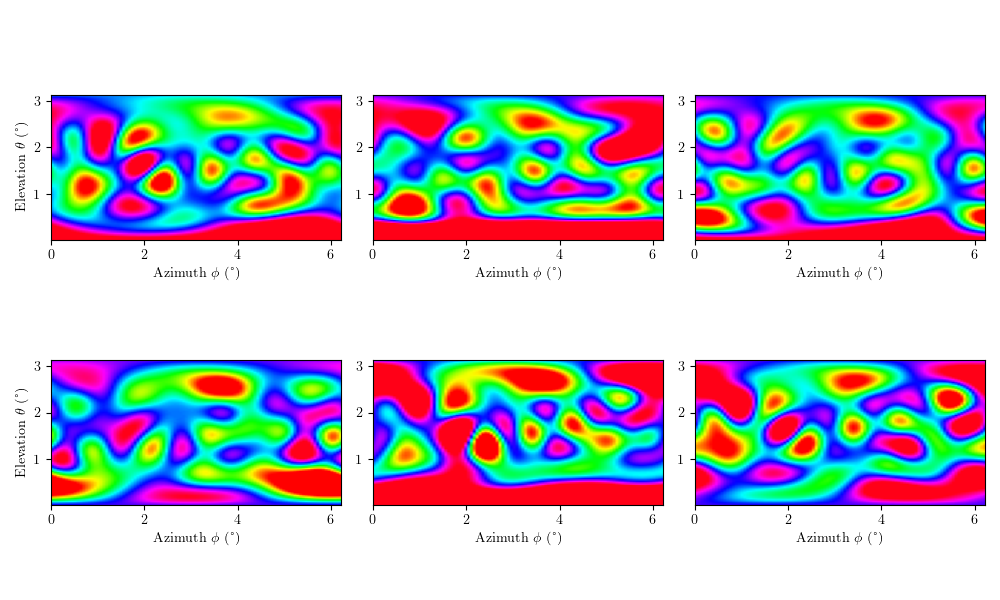

In [29]:
i = 0

fig, ax = plt.subplots(2,NbViol//2,figsize=(10,6))
for v in range(NbViol):  
    ax.flat[v].imshow(WBDgN[v,:].reshape(NbPh, NbTh).T, 
                 extent = [angles_look[0, 1], angles_look[-1, 1] , angles_look[0, 0], angles_look[ -1, 0] ],  
                 cmap='hsv', vmin = -clim, vmax = clim)
    ax.flat[v].set_xlabel(r'Azimuth $\phi$ (°)')  
    if not v%3 :
        ax.flat[v].set_ylabel(r"Elevation $\theta$ (°)")  
fig.tight_layout()           
       

In [30]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
SHOrders = []
CmnColors = []
OColors = px.colors.qualitative.Dark2[:OSH+1]
WBOSHSpec = np.sum(OSHSpec, axis=2)
WBOSHSpecN = WBOSHSpec / np.max(np.abs(WBOSHSpec))

for o in range(OSH + 1):
    for d in range(-o, o + 1):        
        SHOrders.append(o)
        CmnColors.append(px.colors.qualitative.Dark2[o])
WBCmn = np.zeros((NbViol, NbSH), dtype=np.complex128)
for v in range(NbViol):
    WBCmn[v, :] = np.sum(Cmn[v, :, :], axis=1)
WBCmnN = WBCmn / np.max(np.abs(WBCmn))

# Create subplots
figSH = make_subplots(rows=NbViol, cols=2, shared_xaxes=True, vertical_spacing=0.02)
SpecHSLayout = go.Layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

for v in range(NbViol):
    AWBCmn = np.abs(WBCmnN[v, :])    
    bars = go.Bar(
        x=np.arange(NbSH),
        y=AWBCmn,
        name=f'|Cmn| Violin #{v}',
        marker_color=CmnColors[:NbSH]
    )
    figSH.add_trace(bars, row=v + 1, col=1)
    figSH.add_annotation(
        x=0.9, y=0.95,
        xref='x domain', yref='y domain',
        xanchor='right', yanchor='top',
        text=f'Violin #{NumViolon[v]}',
        showarrow=False,
        font=dict(size=12, color='white'),
        align='right',
        row=v + 1, col=1
    )
    
    baro = go.Bar(
         x=np.arange(OSH+1),
         y=WBOSHSpecN[v,:],
         name=f'E_o Violin #{v}',
         marker_color=OColors[:OSH+1]
    )
    figSH.add_trace(baro, row=v + 1, col=2)
    
figSH.update_layout(
    height=NbViol * 100,  # Adjust height as needed
    width = 1000,  # Adjust width as needed
    title_text='Wide Band SH Coefficients for Each Violin and Normalized Energy by SH orders',
    showlegend = False,
    margin = dict(l=20, r=20, t=50, b=20) 
    )# Smaller margins
for v in range(NbViol):
    figSH.update_yaxes(range=[0, 1], row=v + 1, col=1, showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
    figSH.update_yaxes(range=[0, 1], row=v + 1, col=2, showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
    figSH.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')

# Show the plot
figSH.show()


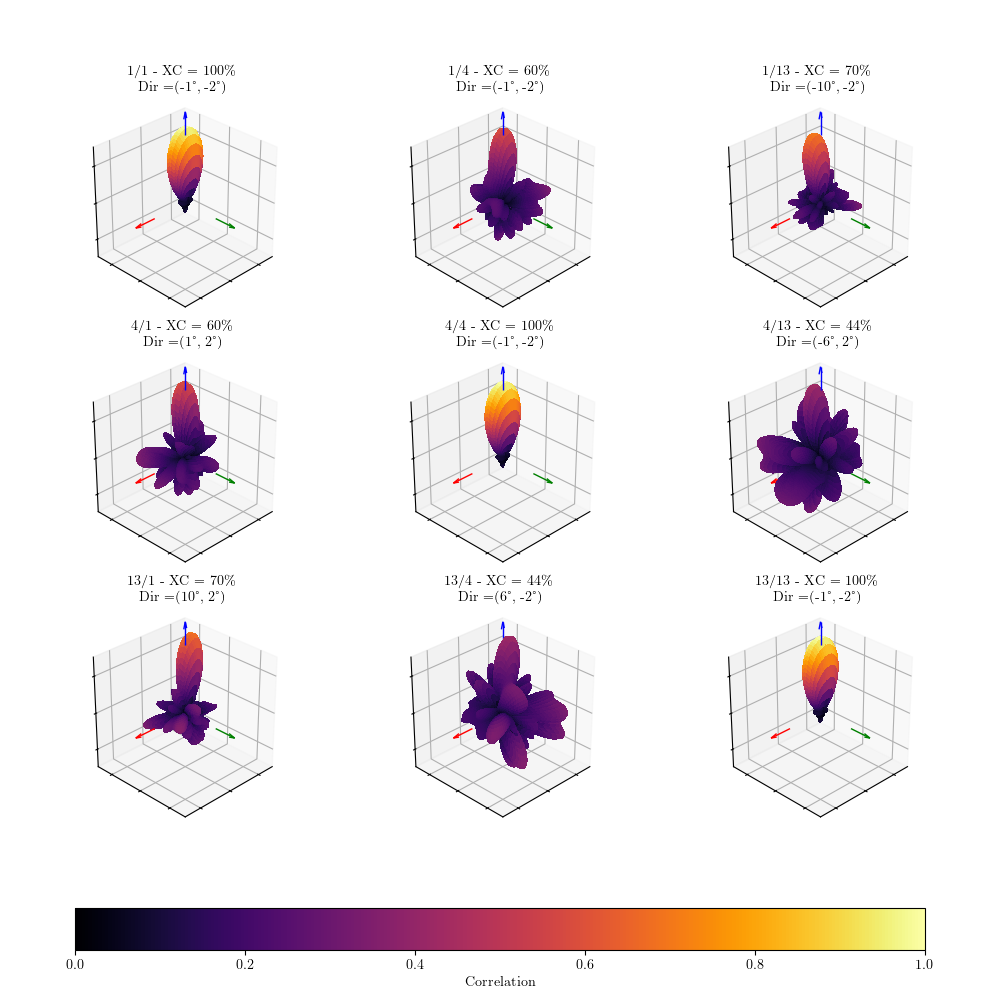

In [31]:
from dash_bootstrap_templates import load_figure_template
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

# load_figure_template(['darkly'])
# template = 'darkly'
import plotly.io as pio
pio.renderers.default = 'notebook'
Rmax = 0
WBXCDg = []
XXCDg = []
titles = []
SelectedViol = [0,1,5]
NbViol = len(SelectedViol)
i=0
for v in SelectedViol:
    for w in SelectedViol:    
        XXCDg.append(sp.spherical_correlation(WBCmn[w,:],WBCmn[v,:], angles_look, kvect=[0]))
        titles.append(f'V{NumViolon[v]} vs V{NumViolon[w]}')
WBXCDg = np.array(XXCDg).squeeze()
WBXCDgmax = np.max(np.abs(WBXCDg))
WBXCDgN = WBXCDg / WBXCDgmax
DirMax = np.argmax(np.abs(WBXCDgN), axis=1)

# Create subplots with 3D scenes
figXC, ax = plt.subplots(NbViol, NbViol, figsize=(10,10), subplot_kw={'projection': '3d'})
figXC.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)
           
i = -1
for v in SelectedViol:
    for w in SelectedViol:    
        i += 1
        surf = splots.draw_directivity_balloon(dir_func = np.abs(WBXCDgN[i,:]), angular_grid = angles_look, 
                                nbtheta = 2*Nang+2, nbphi = 2*Nang+2, 
                                fig = figXC, ax = ax.flat[i], 
                                scale = 'linear',
                                ref_sphere  = False, phase =False, 
                                colorbar = False) 
        
        # ax.flat[i].set_xlabel('X (m)', fontsize=8)      
        # ax.flat[i].set_ylabel('Y (m)', fontsize=8)
        # ax.flat[i].set_zlabel('Z (m)', fontsize=8)
        L = 0.75
        ax.flat[i].set_xlim(-L, L)
        ax.flat[i].set_ylim(-L, L)  
        ax.flat[i].set_zlim(-L, L)
        
        ax.flat[i].quiver(0.5, 0, 0, 0.3, 0, 0, color='red', linewidth=1, label='X-axis')  # X-axis
        ax.flat[i].quiver(0, 0.5, 0, 0, 0.3, 0, color='green', linewidth=1, label='Y-axis')  # Y-axis
        ax.flat[i].quiver(0, 0, 0.9, 0, 0, 0.3, color='blue', linewidth=1, label='Z-axis')  # Z-axis

        ax.flat[i].view_init(elev=30, azim=45, roll=0) 
        ax.flat[i].dist = 0.5  
        ax.flat[i].set_aspect('equal')
        ax.flat[i].set_title(titles[i], fontsize=8)
        ax.flat[i].set_title(f'{NumViolon[v]}/{NumViolon[w]} - XC = {100*np.max(np.abs(WBXCDgN[i])):.0f}\% \n Dir =({angles_look[DirMax[i],0]*180/pi-90:.0f}°, {angles_look[DirMax[i],1]*180/pi-90:.0f}°)')
       
norm = mcolors.Normalize(vmin=0, vmax=1)
mappable = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
mappable.set_array(np.angle(WBDgN[0,:]))
cbar = figDg.colorbar(mappable, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1) 
cbar.set_label('Correlation')
figXC.tight_layout()


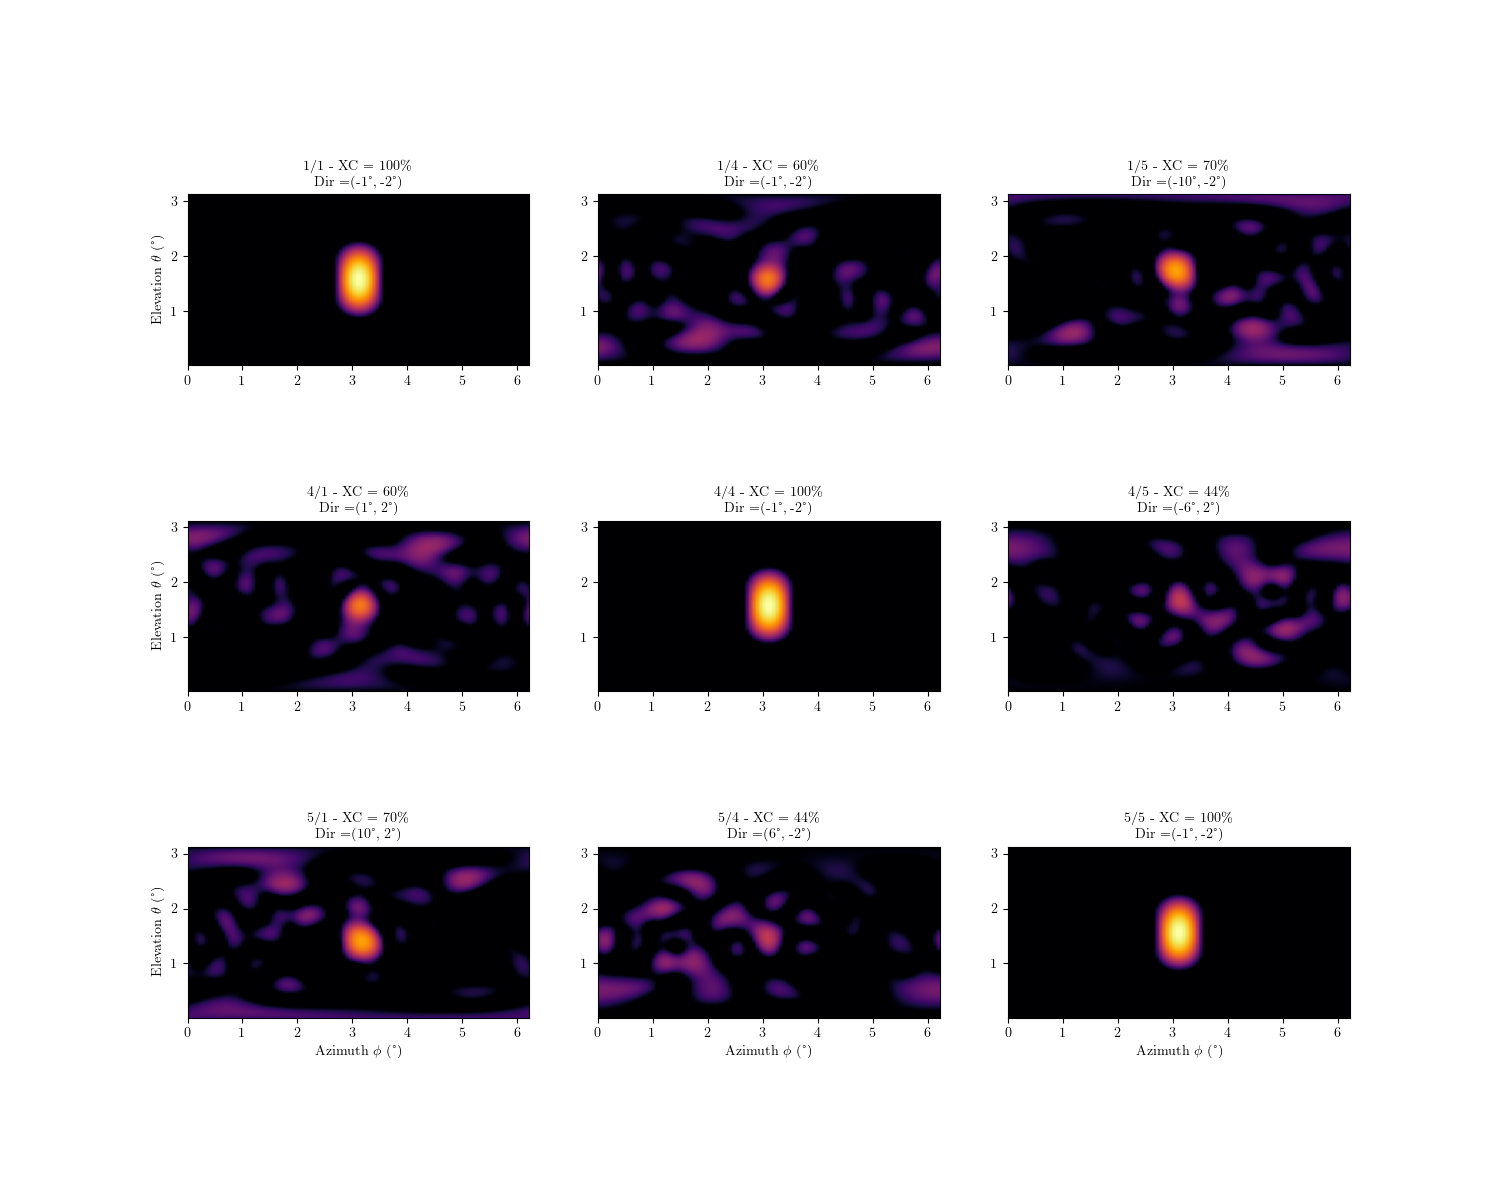

In [32]:
i = 0
dBSeuil = 15
fig,ax = plt.subplots(NbViol,NbViol,figsize=(15,12))
cmap = Magnitudescale
for v in range(NbViol):
    for w in range(NbViol):
        Map = np.abs(WBXCDgN[v*NbViol + w,:].reshape(NbPh, NbTh)).T
        Map = np.roll(Map, NbPh//4, axis = 1)
        ax[v, w].imshow(20*np.log10(Map),
                        extent = [angles_look[0, 1], angles_look[-1, 1] , angles_look[0, 0], angles_look[ -1, 0] ],  
                        cmap=cmap, vmin = -dBSeuil, vmax = 0)
        ax[v, w].set_title(f'{NumViolon[v]}/{NumViolon[w]} - XC = {100*np.max(np.abs(WBXCDgN[v*NbViol+w])):.0f}\% \n Dir =({angles_look[DirMax[i],0]*180/pi-90:.0f}°, {angles_look[DirMax[i],1]*180/pi-90:.0f}°)')
        if v==NbViol-1 : 
            ax[v, w].set_xlabel(r"Azimuth $\phi$ (°)")  
        if w == 0 :
            ax[v, w].set_ylabel("Elevation $\\theta$ (°)")             
        i = i + 1